# Noise and NumPy

Py5canvas provides functions to generate Perlin noise with 1D, 2D, and 3D variants. Perlin noise is a type of gradient noise often used in computer graphics to create natural-appearing textures, terrains, and other effects. It is characterized by its smoothness and continuity, making it ideal for simulating natural phenomena.

Similarly to P5js and Processing, Py5canvas provides a [`noise`](https://p5js.org/reference/p5/noise/) function that outputs values between 0 and 1 and a [`noise_detail`](https://p5js.org/reference/p5/noiseDetail/) function to adjust the characteristics of the noise. 


However, noise computations can be slow in Python and directly converting P5js sketches that compute noise for many different points will result in a slow performance. E.g. computing 900 noise values takes almost one second!

Time taken: 0.26982879638671875 seconds


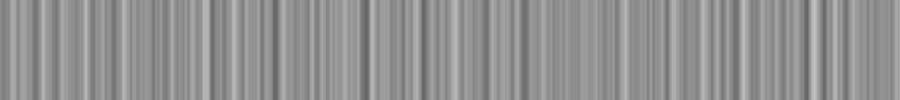

In [13]:
from py5canvas import *
import time
create_canvas(900, 100)
t = time.time() 
for x in range(width):
    gray = noise(x * 0.1)*255
    stroke(gray)
    line(x, 0, x, height)
print("Time taken:", time.time() - t, "seconds")
show()

We can drastically accelerate this by passing a numpy array to the `noise` function. This way the noise values are internally computed as NumPy array operations resulting in much faster performance that is comparable (or possibly faster) than P5js. For the example above, we can create a numpy array with 900 values and pass it to the `noise` function. An ideal tool for doing so is the `np.linspace` function that creates evenly spaced values over a specified interval.


Time taken: 0.012590646743774414 seconds


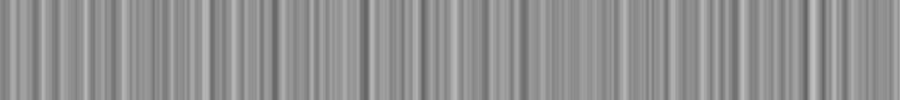

In [9]:
import numpy as np
create_canvas(900, 100)
t = time.time() 
xs = np.linspace(0, width, 900)
gray = noise(xs * 0.1)*255
for i in range(900):
    stroke(gray[i])
    line(i, 0, i, height)
print("Time taken:", time.time() - t, "seconds")
show()

A similar approach can be used for 2D and 3D noise. If creating a "grid" of noise values, we can use the helper function `noise_grid` that creates a grid of noise values for a given width and height. The output is like a grayscale image. E.g. to create a 400x400 noise texture we can do the following:

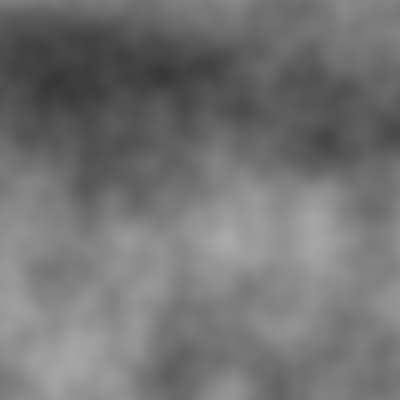

In [12]:
create_canvas(400, 400)
x = np.linspace(0, 2, 400)
y = np.linspace(0, 2, 400)
noise_img = noise_grid(x, y)
image(noise_img, 0, 0)
show()

Doing something like this using nested loops would be very slow in Python, but using NumPy arrays makes it efficient enough.